In [1]:
import netcomp as nc
from netcomp.linalg import _eigs as eigs
figures_dir = '/Users/peterwills/google-drive/Research/Graph Distance Study/metrics_paper/figures'

In [2]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Spectral Density Plots

We're going to get histogram (density) plots of the spectral of various graphs we compare in Section 3.

# Single Model 

For defense slides

## Uncorrelated

In [39]:
n = 100
m = 6
p = (n-m)*m / (n*(n-1)/2) # so that volume of ER and BA graphs match

evals_ER = []

for _ in range(1000):

    G1 = nx.erdos_renyi_graph(n,p)

    A1 = nx.adjacency_matrix(G1)

    evals1,evecs1 = eigs(A1)
    
    evals_ER += list(evals1)

In [44]:
2*np.sqrt(n*p*(1-p))

6.3547528181076425

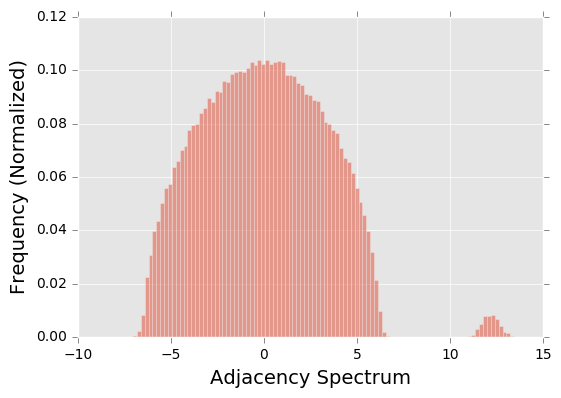

In [15]:
plt.figure(figsize=(6,4))
plt.hist(evals_ER,bins=100,alpha=0.5,normed=True,label='Uncorrelated');
# plt.xlim([0,50]);
plt.ylabel('Frequency (Normalized)',color='k');
plt.xlabel('Adjacency Spectrum',color='k')
plt.xticks(color='k');
plt.yticks(color='k');
# plt.legend();

fig = plt.gcf();
fig.savefig('/Users/peterwills/Desktop/ER_spectrum.pdf',dpi=300,bbox_inches='tight');

In [16]:
n = 100
m = 6
p = (n-m)*m / (n*(n-1)/2) # so that volume of ER and BA graphs match

evals_ER = []

for _ in range(1000):

    G1 = nx.barabasi_albert_graph(n,m)

    A1 = nx.adjacency_matrix(G1)

    evals1,evecs1 = eigs(A1)
    
    evals_ER += list(evals1)

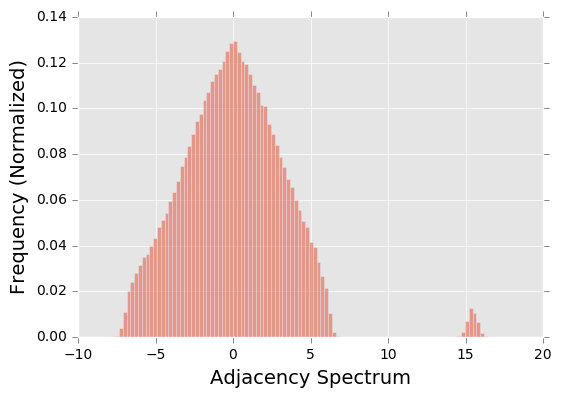

In [17]:
plt.figure(figsize=(6,4))
plt.hist(evals_ER,bins=100,alpha=0.5,normed=True,label='Uncorrelated');
# plt.xlim([0,50]);
plt.ylabel('Frequency (Normalized)',color='k');
plt.xlabel('Adjacency Spectrum',color='k')
plt.xticks(color='k');
plt.yticks(color='k');
# plt.legend();

fig = plt.gcf();
fig.savefig('/Users/peterwills/Desktop/PA_spectrum.pdf',dpi=300,bbox_inches='tight');

In [25]:
k = 4
n = 100
p = 0.0404 # to match watts strogatz
beta = 0.1

evals_WS = []
evals_WS0 = []

for _ in range(1000):

    G1 = nx.connected_watts_strogatz_graph(n,k,0)
    G2 = nx.connected_watts_strogatz_graph(n,k,beta)

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]

    evals1,evecs1 = eigs(A1)
    evals2,evecs2 = eigs(A2)

    evals_WS0 += list(evals1)
    evals_WS += list(evals2)

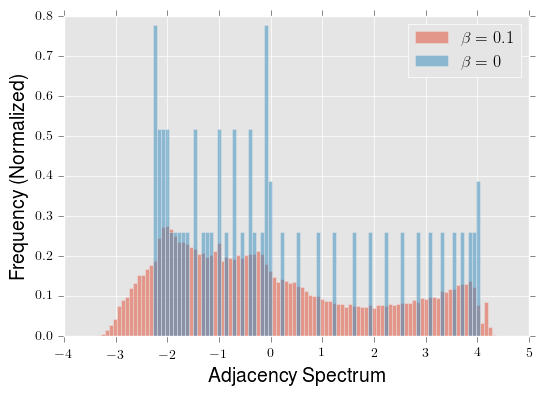

In [35]:
plt.rc('text', usetex=True)

plt.figure(figsize=(6,4))
_,bins,_ = plt.hist(evals_WS,bins=100,alpha=0.5,normed=True,label=r'$\beta=0.1$');
plt.hist(evals_WS0,bins=bins,alpha=0.5,normed=True,label=r'$\beta=0$ ');
# plt.xlim([-5,6])
plt.xlabel('Adjacency Spectrum',color='k');
plt.ylabel('Frequency (Normalized)',color='k');
plt.xticks(color='k');
plt.yticks(color='k');
plt.legend();

fig = plt.gcf();
fig.savefig('/Users/peterwills/Desktop/ws_spectrum.pdf',dpi=300,bbox_inches='tight');

# Preferential Attachment

In [3]:
n = 100
m = 6
p = (n-m)*m / (n*(n-1)/2) # so that volume of ER and BA graphs match

evals_PA = []
evals_ER = []

for _ in range(1000):

    G1 = nx.erdos_renyi_graph(n,p)
    G2 = nx.barabasi_albert_graph(n,m)

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]
    L1,L2 = [nc.laplacian_matrix(A) for A in [A1,A2]]

    evals1,evecs1 = eigs(L1)
    evals2,evecs2 = eigs(L2)
    
    evals_ER += list(evals1[1:])
    evals_PA += list(evals2[1:])

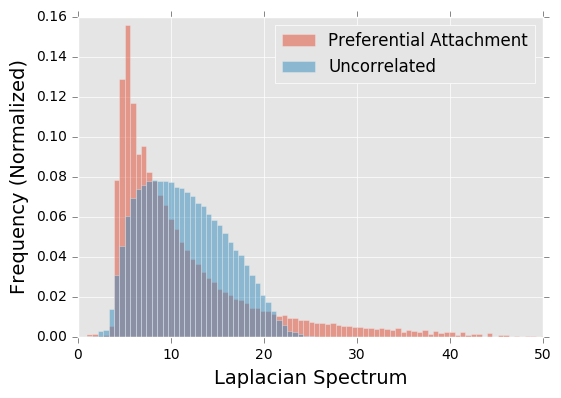

In [4]:
plt.figure(figsize=(6,4))
vals,bins,_ = plt.hist(evals_PA,bins=100,alpha=0.5,normed=True,label='Preferential Attachment');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Uncorrelated');
plt.xlim([0,50]);
plt.xlabel('Laplacian Spectrum',color='k');
plt.ylabel('Frequency (Normalized)',color='k');
plt.xticks(color='k');
plt.yticks(color='k');
plt.legend();

fig = plt.gcf();
fig.savefig(os.path.join(figures_dir,'pa_spectrum.pdf'),dpi=300,bbox_inches='tight');

# Watts-Strogatz

This one is weird, because we need to get the bins from the histogram we want to appear second.

In [5]:
k = 4
n = 100
p = 0.0404 # to match watts strogatz
beta = 0.1

evals_WS = []
evals_ER = []

for _ in range(1000):

    G1 = nx.erdos_renyi_graph(n,p)
    G2 = nx.connected_watts_strogatz_graph(n,k,beta)

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]

    evals1,evecs1 = eigs(A1)
    evals2,evecs2 = eigs(A2)
    
    evals_ER += list(evals1)
    evals_WS += list(evals2)

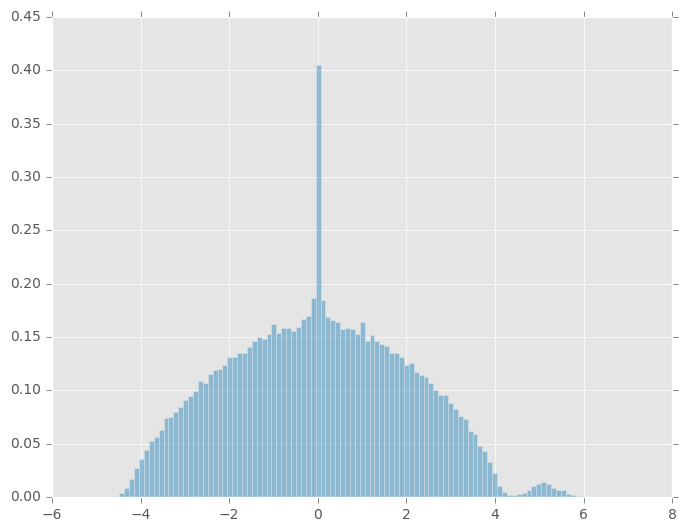

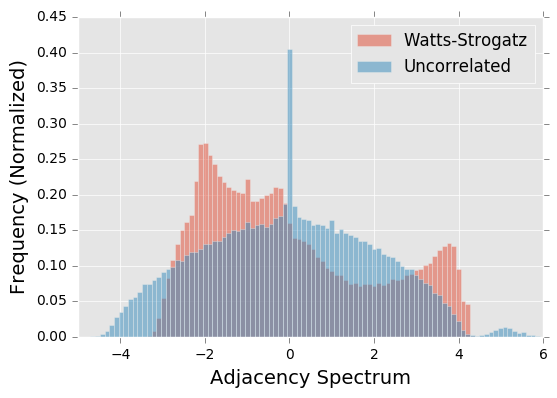

In [6]:
plt.figure()
_,bins,_ = plt.hist(evals_ER,bins=100,alpha=0.5,normed=True,label='Uncorrelated',color=colors[1]);

plt.figure(figsize=(6,4))
plt.hist(evals_WS,bins=bins,alpha=0.5,normed=True,label='Watts-Strogatz');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Uncorrelated');
plt.xlim([-5,6])
plt.xlabel('Adjacency Spectrum',color='k');
plt.ylabel('Frequency (Normalized)',color='k');
plt.xticks(color='k');
plt.yticks(color='k');
plt.legend();

fig = plt.gcf();
fig.savefig(os.path.join(figures_dir,'ws_spectrum.pdf'),dpi=300,bbox_inches='tight');

# Lattice

In [7]:
n = 100
N = 10
M = 10

G2 = nx.grid_2d_graph(N,M)
deg_seq = [item[1] for item in G2.degree_iter()]

evals_L = []
evals_ER = []

for _ in range(1000):

    G1 = nx.random_degree_sequence_graph(deg_seq)
    # G2 is deterministic

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]

    evals1,evecs1 = eigs(A1)
    evals2,evecs2 = eigs(A2) # lazy
    
    evals_ER += list(evals1)
    evals_L += list(evals2)

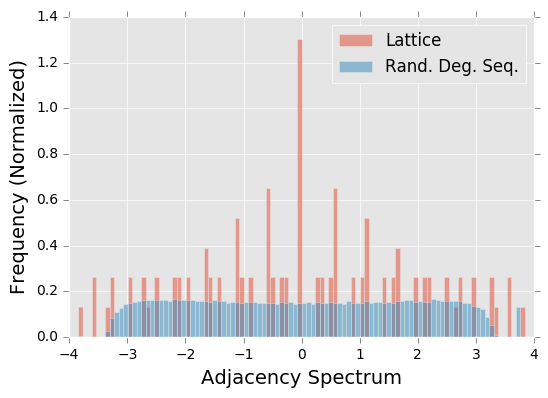

In [8]:
plt.figure(figsize=(6,4))
_,bins,_ = plt.hist(evals_L,bins=100,alpha=0.5,normed=True,label='Lattice');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Rand. Deg. Seq.');
plt.xlabel('Adjacency Spectrum',color='k');
plt.ylabel('Frequency (Normalized)',color='k');
plt.xticks(color='k');
plt.yticks(color='k');
plt.legend();

fig = plt.gcf();
fig.savefig(os.path.join(figures_dir,'lattice_spectrum.pdf'),dpi=300,bbox_inches='tight');

# SBM

In [36]:
n = 100
p = 0.12

# SBM parameters, must average to p so that we have same volume as ER graph
# (note there are 2 partitions of equal size).
pp = 1.9*p
qq = 0.1*p

evals_SBM = []
evals_ER = []

for _ in range(1000):

    G1 = nx.erdos_renyi_graph(n,p)
    G2 = nx.planted_partition_graph(2,n//2,pp,qq)

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]

    evals1,evecs1 = eigs(A1)
    evals2,evecs2 = eigs(A2)
    
    evals_ER += list(evals1)
    evals_SBM += list(evals2)

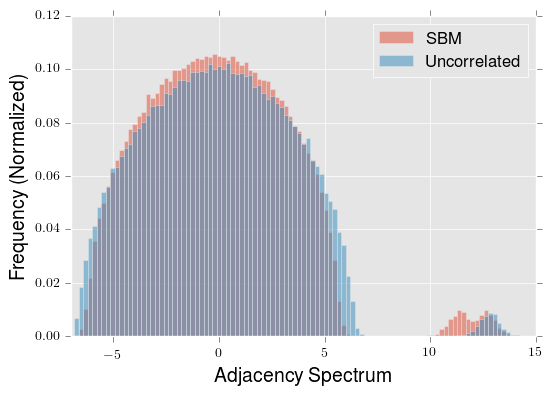

In [38]:
plt.figure(figsize=(6,4))
_,bins,_ = plt.hist(evals_SBM,bins=100,alpha=0.5,normed=True,label='SBM');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Uncorrelated');
plt.xlim([-7,15])
plt.xlabel('Adjacency Spectrum',color='k');
plt.ylabel('Frequency (Normalized)',color='k');
plt.xticks(color='k');
plt.yticks(color='k');
plt.legend();

fig = plt.gcf();
fig.savefig(os.path.join(figures_dir,'sbm_spectrum.pdf'),dpi=300,bbox_inches='tight');
fig.savefig('/Users/peterwills/Desktop/sbm_spectrum.pdf',dpi=300,bbox_inches='tight');

## Random stuff

In [11]:
diff = np.array(evals_SBM).reshape(-1,100) - np.array(evals_ER).reshape(-1,100)
diff = diff[:,::-1]

In [12]:
k = 5
diff = diff[:,:k]

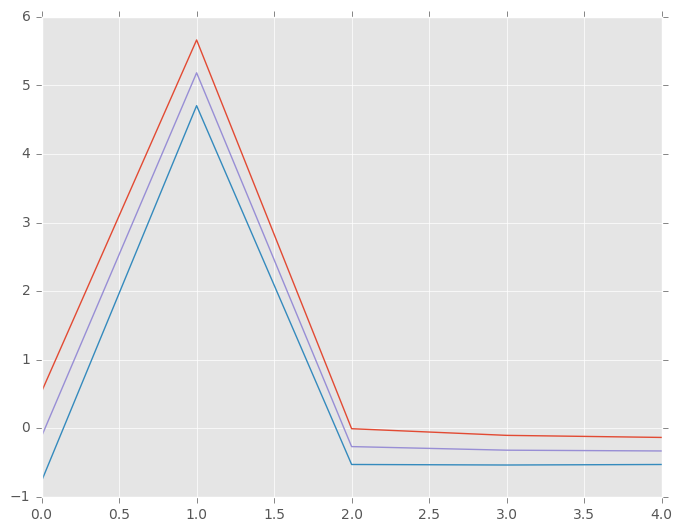

In [13]:
plt.plot(diff.mean(axis=0) + diff.std(axis=0))
plt.plot(diff.mean(axis=0) - diff.std(axis=0))
plt.plot(diff.mean(axis=0))

# Others, for fun

## SBM Laplacian & Normalized Laplacian

In [73]:
n = 100
p = 0.12

# SBM parameters, must average to p so that we have same volume as ER graph
# (note there are 2 partitions of equal size).
pp = 1.9*p
qq = 0.1*p

evals_SBM = []
evals_ER = []

for _ in range(1000):

    G1 = nx.erdos_renyi_graph(n,p)
    G2 = nx.planted_partition_graph(2,n//2,pp,qq)

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]
    L1,L2 = [nc.laplacian_matrix(A) for A in [A1,A2]]

    evals1,evecs1 = eigs(L1)
    evals2,evecs2 = eigs(L2)
    
    evals_ER += list(evals1[1:])
    evals_SBM += list(evals2[1:])

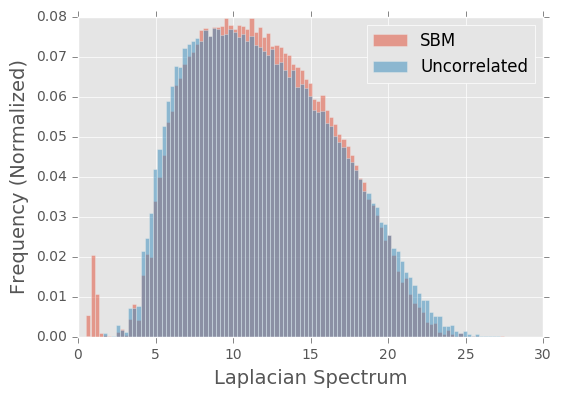

In [74]:
plt.figure(figsize=(6,4))
_,bins,_ = plt.hist(evals_SBM,bins=100,alpha=0.5,normed=True,label='SBM');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Uncorrelated');
# plt.xlim([-7,15])
plt.xlabel('Laplacian Spectrum');
plt.ylabel('Frequency (Normalized)');
plt.legend();

# fig = plt.gcf();
# fig.savefig(os.path.join(figures_dir,'sbm_spectrum.pdf'),dpi=300,bbox_inches='tight');

In [75]:
diff = np.array(evals_SBM).reshape(-1,99) - np.array(evals_ER).reshape(-1,99)

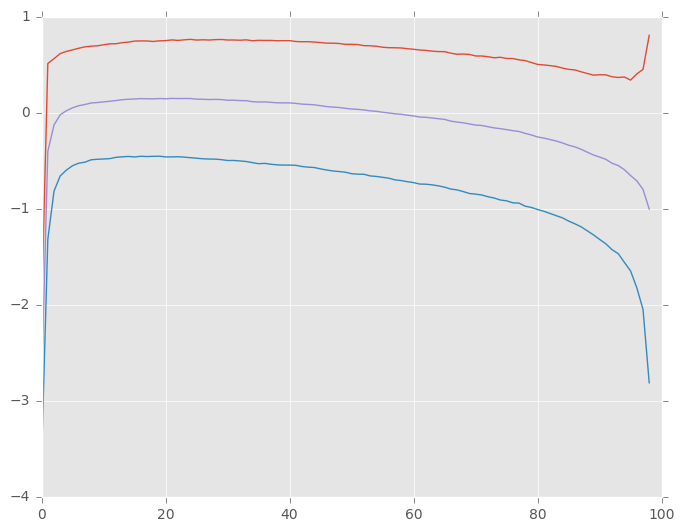

In [76]:
plt.plot(diff.mean(axis=0) + diff.std(axis=0))
plt.plot(diff.mean(axis=0) - diff.std(axis=0))
plt.plot(diff.mean(axis=0))

In [77]:
k = 5
diff = diff[:,:k]

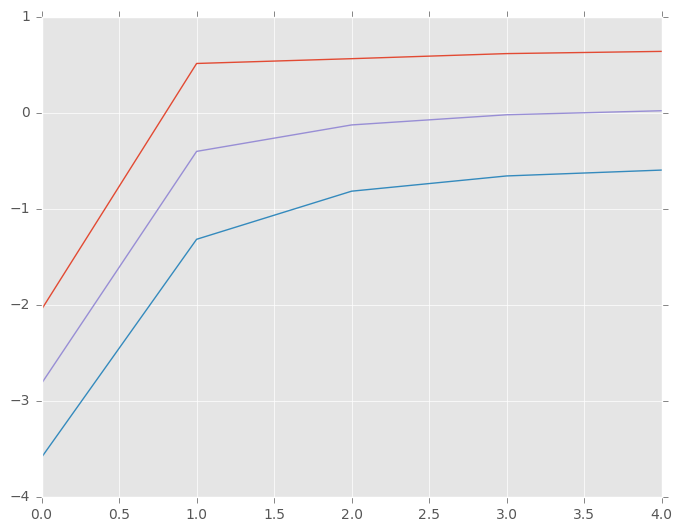

In [78]:
plt.plot(diff.mean(axis=0) + diff.std(axis=0))
plt.plot(diff.mean(axis=0) - diff.std(axis=0))
plt.plot(diff.mean(axis=0))

### Normalized Laplacian

In [79]:
n = 100
p = 0.12

# SBM parameters, must average to p so that we have same volume as ER graph
# (note there are 2 partitions of equal size).
pp = 1.9*p
qq = 0.1*p

evals_SBM = []
evals_ER = []

for _ in range(1000):

    G1 = nx.erdos_renyi_graph(n,p)
    G2 = nx.planted_partition_graph(2,n//2,pp,qq)

    A1,A2 = [nx.adjacency_matrix(G) for G in [G1,G2]]
    L1,L2 = [nc.laplacian_matrix(A,normalized=True) for A in [A1,A2]]

    evals1,evecs1 = eigs(L1)
    evals2,evecs2 = eigs(L2)
    
    evals_ER += list(evals1[1:])
    evals_SBM += list(evals2[1:])

/Users/peterwills/google-drive/python/my_packages/netcomp/netcomp/linalg/matrices.py:92: RuntimeWarning: divide by zero encountered in power
  rootD = sps.spdiags(np.power(degs,-1/2), [0], n, n, format='csr')


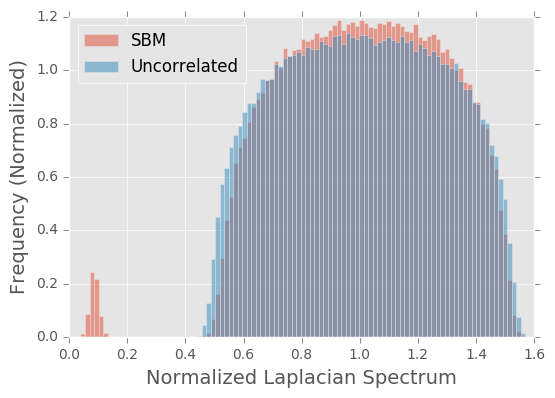

In [85]:
plt.figure(figsize=(6,4))
_,bins,_ = plt.hist(evals_SBM,bins=100,alpha=0.5,normed=True,label='SBM');
plt.hist(evals_ER,bins=bins,alpha=0.5,normed=True,label='Uncorrelated');
# plt.xlim([-7,15])
plt.xlabel('Normalized Laplacian Spectrum');
plt.ylabel('Frequency (Normalized)');
plt.legend();

In [81]:
diff = np.array(evals_SBM).reshape(-1,99) - np.array(evals_ER).reshape(-1,99)

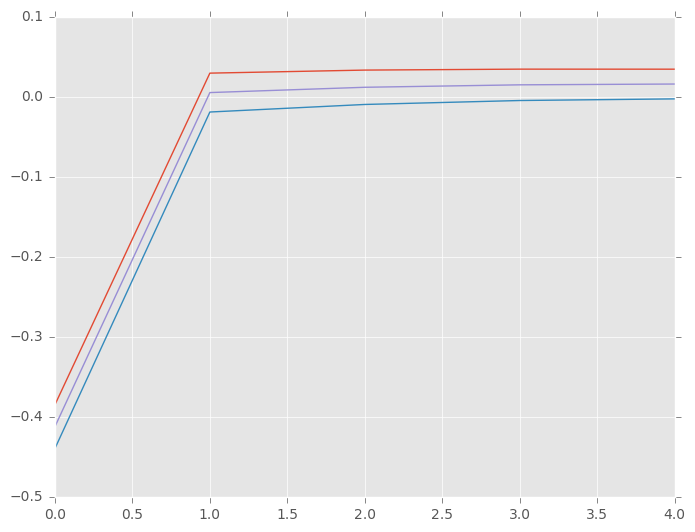

In [87]:
plt.plot(diff.mean(axis=0) + diff.std(axis=0));
plt.plot(diff.mean(axis=0) - diff.std(axis=0));
plt.plot(diff.mean(axis=0));

In [83]:
k = 5
diff = diff[:,:k]

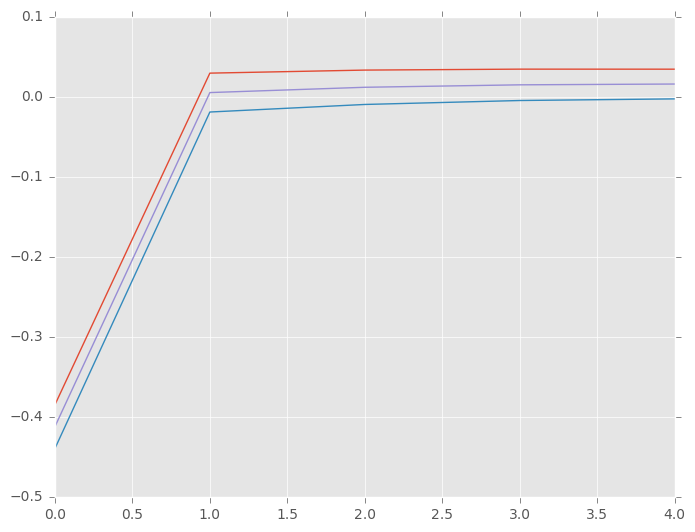

In [86]:
plt.plot(diff.mean(axis=0) + diff.std(axis=0));
plt.plot(diff.mean(axis=0) - diff.std(axis=0));
plt.plot(diff.mean(axis=0));

It's all about how well separated from the bulk that outlier is. It's not well-separated enough in the Laplacian spectrum, and so it gets drowned out in the noise pretty quickly.

**How can I show that this separation is due to the degree distribution? Or is it self-evident?**